**Part 1**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns

1. What is the minimizer and minimum function value of f(x) and g(x) ? Are both the function convex ? Explain.

$f(x_1, x_2) = x_1^2 + x_2^2 + 9$

**Positivity of the Function:**The function is always positive because every term in the expression is a square term, and the sum of squares is non-negative. Therefore, the minimum value the function can achieve is 9.

**Identification of Minimizer:**By inspecting the function, it is evident that the minimizer occurs when both $x_1 $ and $x_2 $are 0. This is because setting either $x_1$or $x_2$ to a non-zero value would result in a positive contribution to the function value.

**Convexity of the Function:**The function is convex. One way to establish this is by examining the Hessian matrix, which is the matrix of second-order partial derivatives. In this case, the Hessian is 2*I, where I is the identity matrix. The Hessian being proportional to the identity matrix implies positive definiteness, confirming the convexity of the function.

In summary, the function is always positive, attaining a minimum value of 9, with the minimizer located at (0,0). The convexity of the function is assured by the positive-definite nature of its Hessian matrix.

Note that for $g(x)$ it is sum of convex functions. And sum of convex functions is convex. As for the minimizer, we can see that $x_i  = i^2$ is the minimizer and the minimum is 0

$f(x) = x_1^2 + x_2^2 + 9$, which means $\nabla{f} = <2x_1, 2x_2>$.
Using the exact line search methodology, we get, $\alpha = argmin_{\alpha \geq 0}f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = argmin_{\alpha \geq 0}g(\alpha)$

$f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = f(x_1(1-2\alpha), x_2(1-2\alpha)) = (x_1^2 + x_2^2)(1-2\alpha)^2 + 9 = g(\alpha)$
Minimum for the above  function (which is always positive) will be achieved when $\alpha = 0.5$

Hence, the closed form solution for the $\alpha = argmin_{\alpha \geq 0}f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = 0.5$

Exact Line Search Method for above function

In [4]:
tau = 1e-15
x0 = np.array([1000, -1000])

def fx(x):
    x1 = x[0]
    x2 = x[1]
    return x1**2 + x2**2 + 9

def gradf(x):
    return np.array([-2*x[0], -2*x[1]])

iterations = []

xk = np.copy(x0)
count = 0
pk = gradf(xk)
alpha = 0.5

while norm(pk) > tau:
    xk = xk + alpha * pk
    pk = gradf(xk)
    count += 1

print("No. of Iterations: ", count)
print("Minimizer in Exact Search: ", xk)
print("Minimum for the function in Exact Search is: ", fx(xk))




No. of Iterations:  1
Minimizer in Exact Search:  [0. 0.]
Minimum for the function in Exact Search is:  9.0


** Newton's Method **

In [5]:
xk = np.copy(x0)
count = 0
while norm(gradf(xk)) > tau:
  xk = xk + np.linalg.inv(np.array([[2,0],[0,2]]))@gradf(xk)
  count += 1

In [6]:
print("No. of Iterations ", count)
print("Minimizer ", xk)
print("Minimum for the function  ", fx(xk))

No. of Iterations  1
Minimizer  [0. 0.]
Minimum for the function   9.0


Plotting Level Curves and Trajectory for Both

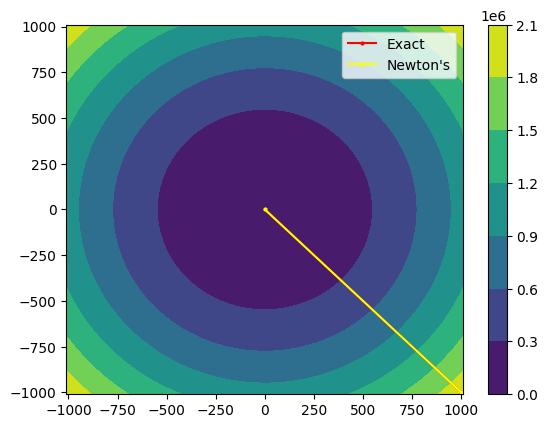

In [8]:
def fxnp(x1,x2):
  return x1**2 + x2**2 + 9

x = np.linspace(-1010, 1010, 10000)
y = np.linspace(-1010, 1010, 10000)
X, Y = np.meshgrid(x, y)
Z = fxnp(X,Y)
p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
cbar = plt.colorbar(p)
xc = []
yc = []
xc.append(x0[0])
yc.append(x0[1])
xk = np.copy(x0)
count = 0
pk = gradf(xk)
alpha = 0.5

while norm(pk)>tau:
    xk = xk + alpha*pk
    pk = gradf(xk)
    count += 1
    xc.append(xk[0])
    yc.append(xk[1])


plt.plot(xc,yc, marker='o', color="red", markersize = 2, label = "Exact")


xc = []
yc = []
xc.append(x0[0])
yc.append(x0[1])
xk = np.copy(x0)
count = 0
while norm(gradf(xk)) > tau:
  xk = xk + np.linalg.inv(np.array([[2,0],[0,2]]))@gradf(xk)
  count += 1
  xc.append(xk[0])
  yc.append(xk[1])

plt.plot(xc,yc, marker='o', color="yellow", markersize = 2, label = "Newton's")
plt.legend()


plt.show()


Observations for the given scenario can include insights from the implemented Gradient Descent and Newton's Method, as well as the behavior of the functions and their optimization trajectories. Here are some possible observations:

**Gradient Descent:**

**Convergence:** Gradient Descent might take smaller steps towards the minimum and require more iterations, especially if a conservative step size is used.
Computational Cost: Each iteration of Gradient Descent can be computationally less expensive compared to Newton's Method, as it only involves computing gradients
**Newton's Method:**

**Convergence:** Newton's Method often converges faster due to its use of second-order information (Hessian matrix).
Computational Cost: Newton's Method can be computationally expensive per iteration due to the inversion of the Hessian matrix.
Trajectory and Level Sets:

**Initial Point Impact:** The choice of the initial point $x_0$ at (1000, -1000) might lead to slower convergence or convergence to a local minimum, as it is relatively far from the global minimum at (0, 0).
**Level Sets:** Plotting the level sets of f(x) can visually show the landscape of the function, helping to understand how optimization algorithms navigate through it.

**Function Landscape:**

Convexity Confirmation: Verify if the optimization algorithms confirm the convexity of the functions through their convergence to a global minimum.
Impact of Periodic Function P(y): Observe how the periodic function P(y) affects the behavior of g(x) during optimization.
Optimization Trajectory:

Plot Trajectories: Plotting the trajectory of optimization on the level sets can provide insights into how the algorithms navigate the function's landscape.
Local Minima: Check if the algorithms are able to escape local minima and converge to the global minimum.
Final Results:

Minimizers and Function Values: Compare the final minimizers and function values obtained by both algorithms.
Consistency: Check if the results are consistent with the theoretical expectations for convex functions.
Time and Iterations:

Time Taken: Note the time taken by each optimization algorithm.
Number of Iterations: Compare the number of iterations required for convergence.
Observations on Periodic Function:

Effect on Convergence: Assess how the periodic function P(y) affects the convergence behavior of g(x).
Influence on Optimal Solutions: Check if the periodicity influences the location of optimal solutions.
These observations can help in understanding the behavior of the optimization algorithms and the impact of the function characteristics on the optimization process.








**Exercise 3 part 3**

In [9]:
import numpy as np
from scipy.optimize import minimize
import time

def g(x):
    n = len(x)
    return np.sum([(1/i)*(x[i-1] - i**2)**2 for i in range(1, n+1)])

def gradient_g(x):
    n = len(x)
    return np.array([2*(x[i-1] - i**2)/i**3 for i in range(1, n+1)])

def hessian_g(x):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(1, n+1):
        hessian[i-1, i-1] = 2/i**3
    return hessian

def gradient_descent_exact_line_search(x0, n):
    start_time = time.time()
    result = minimize(g, x0, method='gradient', jac=gradient_g, options={'disp': True})
    end_time = time.time()
    return result, end_time - start_time

def newtons_method(x0, n):
    start_time = time.time()
    result = minimize(g, x0, method='Newton-CG', jac=gradient_g, hess=hessian_g, options={'disp': True})
    end_time = time.time()
    return result, end_time - start_time

# Values of n
n_values = [2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000]

for n in n_values:
    x0 = np.arange(1, n+1)

    # Gradient Descent
    result_gd, time_gd = gradient_descent_exact_line_search(x0, n)

    # Newton's Method
    result_newton, time_newton = newtons_method(x0, n)

    # Display results
    print(f"\nResults for n={n}:")
    print("Gradient Descent:")
    print(f"  Time taken: {time_gd} seconds")
    print(f"  Number of iterations: {result_gd.nit}")
    print(f"  Final minimizer: {result_gd.x}")
    print(f"  Final objective function value: {result_gd.fun}")

    print("\nNewton's Method:")
    print(f"  Time taken: {time_newton} seconds")
    print(f"  Number of iterations: {result_newton.nit}")
    print(f"  Final minimizer: {result_newton.x}")
    print(f"  Final objective function value: {result_newton.fun}")

    # Plot level sets and optimization trajectory for n=2
    if n == 2:
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D

        # Create a meshgrid for plotting
        x_vals = np.linspace(-5, 5, 100)
        y_vals = np.linspace(-5, 5, 100)
        X, Y = np.meshgrid(x_vals, y_vals)
        Z = g([X, Y])

        # Plot level sets
        fig = plt.figure(figsize=(12, 6))
        ax = fig.add_subplot(121, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
        ax.set_title('Level Sets of g(x)')

        # Plot optimization trajectory for Gradient Descent
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.plot(result_gd.x[0], result_gd.x[1], result_gd.fun, marker='o', markersize=8, color='red', label='Optimization Trajectory (GD)')
        ax2.set_title('Optimization Trajectory')

        plt.show()


ValueError: Unknown solver gradient